<a href="https://colab.research.google.com/github/inuwamobarak/swin-transformers/blob/main/SwinForImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch datasets

In [6]:
# Import necessary libraries
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
# Accesssing images from the web
import urllib.parse as parse
import os
from PIL import Image
import requests

# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

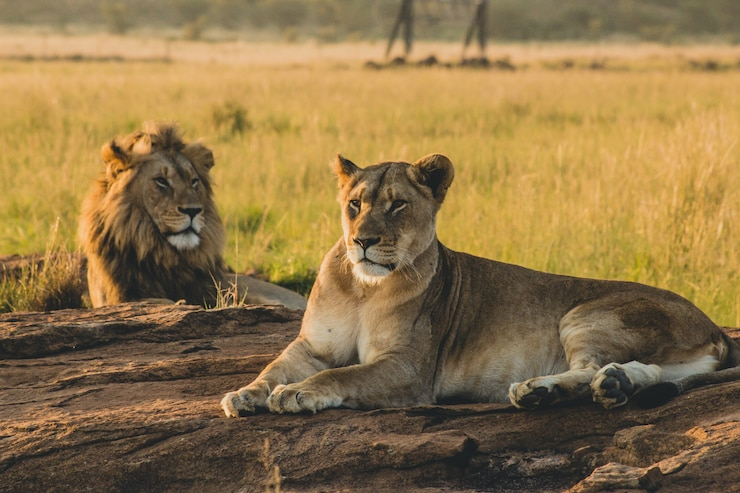

In [8]:
# Display Image
url = "https://img.freepik.com/free-photo/male-female-lions-laying-sand-resting_181624-2237.jpg?w=740&t=st=1690535667~exp=1690536267~hmac=0f5fb82df83f987848335b8bc5c36a1ee534f40301d2b7c095a2e5a62ff153fd"
image = load_image(url)

image

In [4]:
# Load the pre-trained image processor (AutoImageProcessor)
# The "microsoft/swin-tiny-patch4-window7-224" is the model checkpoint used for processing images
image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

# Load the pre-trained Swin Transformer model for image classification
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

# Prepare the input for the model using the image processor
# The image is preprocessed and converted to PyTorch tensors
inputs = image_processor(image, return_tensors="pt")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [5]:
# Perform inference using the Swin Transformer model
# The logits are the raw output from the model before applying softmax
with torch.no_grad():
    logits = model(**inputs).logits

# Predict the label for the image by selecting the class with the highest logit value
predicted_label = logits.argmax(-1).item()

# Retrieve and print the predicted label using the model's id2label mapping
print(model.config.id2label[predicted_label])

lion, king of beasts, Panthera leo
